In [1]:
import data_viz
import preprocessor
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

project_path = r"/Users/loucamalerba/Desktop/IMPORTANT/CentraleSupelec/Cours 2A/Machine Learning Casa/Projet_ML_Casa/"
ORY_dataset_path = project_path + r"make_dataset/flights_history_last_12_months_ORY.csv"
ORY_df = preprocessor.make_df(ORY_dataset_path)
BVA_dataset_path = project_path + r"make_dataset/flights_history_last_12_months_BVA.csv"
BVA_df = preprocessor.make_df(BVA_dataset_path)
CDG_dataset_path = project_path + r"make_dataset/flights_history_last_12_months_CDG.csv"
CDG_df = preprocessor.make_df(CDG_dataset_path)


dataset_df = pd.concat([ORY_df, BVA_df, CDG_df])

#dataset_df.drop(["Flight Number", "Airline Name", "Airline ICAO Code", "Departure Airport IATA", "Departure Airport ICAO", "Arrival Airport ICAO"], inplace=True, axis=1)
dataset_df.drop(["Airline Name", "Airline ICAO Code", "Departure Airport ICAO", "Arrival Airport ICAO"], inplace=True, axis=1)
preprocessor.convert_date_columns(dataset_df, ["Scheduled Departure Time", "Estimated Departure Time", "Actual Departure Time", "Scheduled Arrival Time", "Estimated Arrival Time"])
preprocessor.make_departure_delay_column(dataset_df)
preprocessor.make_estimated_departure_delay_column(dataset_df)
dataset_df["Is Actual Departure Time Nan"] = dataset_df["Actual Departure Time"].isna()
dataset_df["Is Estimated Departure Time Nan"] = dataset_df["Estimated Departure Time"].isna()
dataset_df["Is Departure Gate Nan"] = dataset_df["Departure Gate"].isna()


In [3]:
dataset_df[dataset_df["Flight Status"] == "cancelled"]

,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Departure Gate,Scheduled Departure Time,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
303,af6120,af,ory,3,c18,2024-04-15 16:30:00,2024-04-15 16:48:00,NaT,tls,2024-04-15 17:45:00,NaT,cancelled,NaN,18.0,True,False,False
491,tu9001,tu,ory,NaN,NaN,2024-04-15 21:40:00,NaT,NaT,lju,2024-04-15 22:58:00,NaT,cancelled,NaN,NaN,True,True,True
509,ib5582,ib,ory,orly,NaN,2024-04-16 06:30:00,NaT,NaT,fco,2024-04-16 08:35:00,NaT,cancelled,NaN,NaN,True,True,True
510,la5898,la,ory,orly,NaN,2024-04-16 06:30:00,NaT,NaT,fco,2024-04-16 08:35:00,NaT,cancelled,NaN,NaN,True,True,True
511,qr3745,qr,ory,orly,NaN,2024-04-16 06:30:00,NaT,NaT,fco,2024-04-16 08:35:00,NaT,cancelled,NaN,NaN,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889078,fi543,fi,cdg,1,NaN,2025-04-11 14:00:00,NaT,NaT,kef,2025-04-11 15:35:00,NaT,cancelled,NaN,NaN,True,True,True
889515,dl8548,dl,cdg,2e,l22,2025-04-11 16:40:00,2025-04-11 16:50:00,NaT,iad,2025-04-11 19:15:00,NaT,cancelled,NaN,10.0,True,False,False
889516,kl2243,kl,cdg,2e,l22,2025-04-11 16:40:00,2025-04-11 16:50:00,NaT,iad,2025-04-11 19:15:00,NaT,cancelled,NaN,10.0,True,False,False
889517,vs6758,vs,cdg,2e,l22,2025-04-11 16:40:00,2025-04-11 16:50:00,NaT,iad,2025-04-11 19:15:00,NaT,cancelled,NaN,10.0,True,False,False


In [4]:
grouped_df = preprocessor.group_flights_optimized(dataset_df)

Processing Groups:  74%|███████▍  | 268915/362819 [01:20<00:28, 3329.31it/s]


In [18]:
grouped_df

,Scheduled Departure Time,Departure Gate,Arrival Airport IATA,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Estimated Departure Time,Actual Departure Time,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
0,2024-04-15 05:45:00,11,mad,"[vy5095, ib3431]","[vy, ib]",cdg,3,2024-04-15 05:39:00,2024-04-15 05:52:00,2024-04-15 07:55:00,2024-04-15 07:30:00,active,7.0,-6.0,False,False,False
1,2024-04-15 06:00:00,e03,dbv,[hv4200],[hv],ory,orly,2024-04-15 06:12:00,2024-04-15 06:06:00,2024-04-15 08:25:00,2024-04-15 08:00:00,active,6.0,12.0,False,False,False
2,2024-04-15 06:00:00,e04,pmo,[hv3810],[hv],ory,orly,2024-04-15 06:10:00,2024-04-15 06:09:00,2024-04-15 08:25:00,2024-04-15 08:09:00,active,9.0,10.0,False,False,False
3,2024-04-15 06:00:00,e07,bcn,[dx4750],[dx],ory,orly,2024-04-15 06:14:00,2024-04-15 06:32:00,2024-04-15 07:40:00,2024-04-15 07:54:00,active,32.0,14.0,False,False,False
4,2024-04-15 06:05:00,e6c,chq,[ed3530],[ed],ory,orly,2024-04-15 06:24:00,2024-04-15 06:45:00,2024-04-15 10:30:00,2024-04-15 10:49:00,active,40.0,19.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268910,2025-04-11 23:20:00,e03,scl,"[kl2258, af406]","[kl, af]",cdg,2e,2025-04-11 23:46:00,2025-04-12 00:01:00,2025-04-12 07:45:00,2025-04-12 07:52:00,active,41.0,26.0,False,False,False
268911,2025-04-11 23:20:00,l44,mnl,"[kl2146, af224]","[kl, af]",cdg,2e,2025-04-12 00:31:00,NaT,2025-04-12 18:30:00,NaT,active,NaN,71.0,True,False,False
268912,2025-04-11 23:25:00,e03,gru,"[kl2415, mu1651, sk9959, af454]","[kl, mu, sk, af]",cdg,2e,2025-04-11 23:22:00,2025-04-11 23:36:00,2025-04-12 06:15:00,2025-04-12 05:55:00,active,11.0,-3.0,False,False,False
268913,2025-04-11 23:25:00,e04,orn,[af1430],[af],cdg,2e,2025-04-11 23:35:00,2025-04-11 23:46:00,2025-04-12 01:05:00,2025-04-12 00:55:00,active,21.0,10.0,False,False,False


In [5]:
grouped_df[grouped_df["Flight Status"] != "active"]

,Scheduled Departure Time,Departure Gate,Arrival Airport IATA,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Estimated Departure Time,Actual Departure Time,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
59,2024-04-15 07:35:00,e05,lhr,"[am5976, dl8718, kq3218, mk9412, uu8680, vs670...","[am, dl, kq, mk, uu, vs, af]",cdg,2e,NaT,NaT,2024-04-15 08:00:00,NaT,cancelled,NaN,NaN,True,True,False
248,2024-04-15 11:00:00,c89,dss,[hc4040],[hc],cdg,2c,NaT,NaT,2024-04-15 15:00:00,NaT,unknown,NaN,NaN,True,True,False
273,2024-04-15 11:30:00,c87,dss,[hc4041],[hc],cdg,2c,NaT,NaT,2024-04-15 15:30:00,NaT,unknown,NaN,NaN,True,True,False
322,2024-04-15 12:15:00,f05,ams,"[am5925, dl8537, g35010, ga9543, kl2012, mk939...","[am, dl, g3, ga, kl, mk, af]",cdg,2f,NaT,NaT,2024-04-15 13:40:00,NaT,cancelled,NaN,NaN,True,True,False
434,2024-04-15 14:10:00,64,pdl,"[tp6509, af9565, s4513]","[tp, af, s4]",cdg,1,2024-04-15 14:55:00,NaT,2024-04-15 16:05:00,NaT,cancelled,NaN,45.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267396,2025-04-10 10:30:00,e08,yul,"[dl8373, kl2040, me4342, vs6822, af342]","[dl, kl, me, vs, af]",cdg,2e,NaT,NaT,2025-04-10 12:05:00,NaT,cancelled,NaN,NaN,True,True,False
268038,2025-04-10 22:50:00,e05,pnr,[af928],[af],cdg,2e,NaT,NaT,2025-04-11 06:05:00,NaT,cancelled,NaN,NaN,True,True,False
268503,2025-04-11 14:15:00,61,muc,"[lh4119, vl2231]","[lh, vl]",cdg,1,NaT,NaT,2025-04-11 15:45:00,NaT,unknown,NaN,NaN,True,True,False
268631,2025-04-11 16:40:00,l22,iad,"[dl8548, kl2243, vs6758, af52]","[dl, kl, vs, af]",cdg,2e,2025-04-11 16:50:00,NaT,2025-04-11 19:15:00,NaT,cancelled,NaN,10.0,True,False,False


In [6]:
# def group_flights(dataset_df):
#     empty_df = pd.DataFrame(columns=dataset_df.columns)

#     unique_sch_dts = dataset_df["Scheduled Departure Time"].unique()
    
#     i = 0
#     for sch_dt in unique_sch_dts:
#         i+=1
#         if i%100 == 0:
#             print(f"{i/len(unique_sch_dts)*100}")
#         Grouper par sch dt:
#         grouped_by_sch_dt = dataset_df[dataset_df["Scheduled Departure Time"] == sch_dt]
#         unique_dep_gate = grouped_by_sch_dt["Departure Gate"].unique()
#         for dep_gate in unique_dep_gate:
#             Grouper par dep gate:
#             grouped_by_dep_gate = grouped_by_sch_dt[grouped_by_sch_dt["Departure Gate"] == dep_gate]
#             unique_arr_airports_iatas = grouped_by_dep_gate["Arrival Airport IATA"].unique()
#             for arr_airport_iata in unique_arr_airports_iatas:
#                 grouped_by_arr_airport_aita = grouped_by_dep_gate[grouped_by_dep_gate["Arrival Airport IATA"] == arr_airport_iata]
                


#                 flight_numbers = grouped_by_arr_airport_aita["Flight Number"].unique()
#                 airline_iatas = grouped_by_arr_airport_aita["Airline IATA Code"].unique()
#                 new_row = {}
#                 for column in empty_df.columns:
#                     if column == "Flight Number":
#                         new_row["Flight Number"] = [flight_numbers]
#                     elif column == "Airline IATA Code":
#                         new_row["Airline IATA Code"] = [airline_iatas]
#                     else:
#                         if len(grouped_by_arr_airport_aita[column].unique()) == 1:
#                             if not str(column) in new_row.keys():
#                                 new_row[str(column)] = []
#                             new_row[str(column)].append(grouped_by_arr_airport_aita[column].unique()[0])
#                         else:
#                             assert "error"
                        
#                 empty_df = pd.concat([empty_df, pd.DataFrame(new_row)], ignore_index=True)

       
# group_flights(dataset_df)

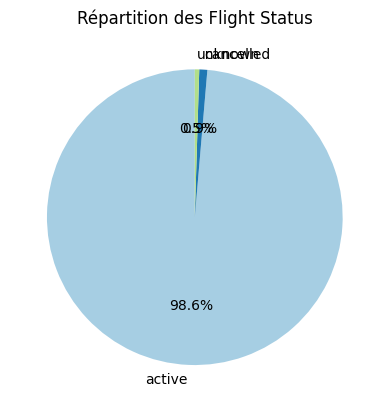

In [7]:
data_viz.camembert_colonne(dataset_df, "Flight Status", titre="Répartition des Flight Status")

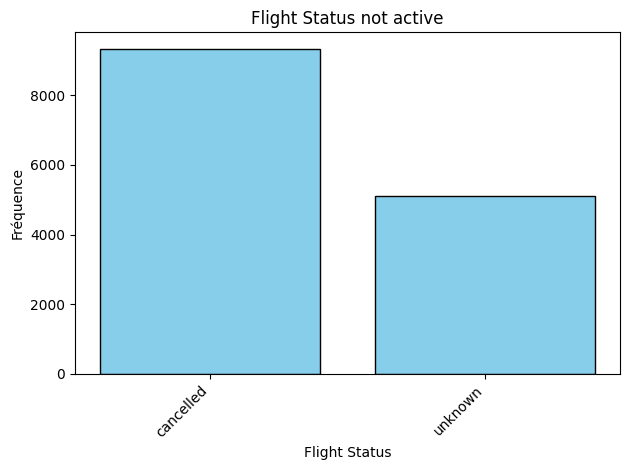

In [8]:
data_viz.make_column_hist(dataset_df[dataset_df["Flight Status"] != "active"], "Flight Status", title="Flight Status not active")

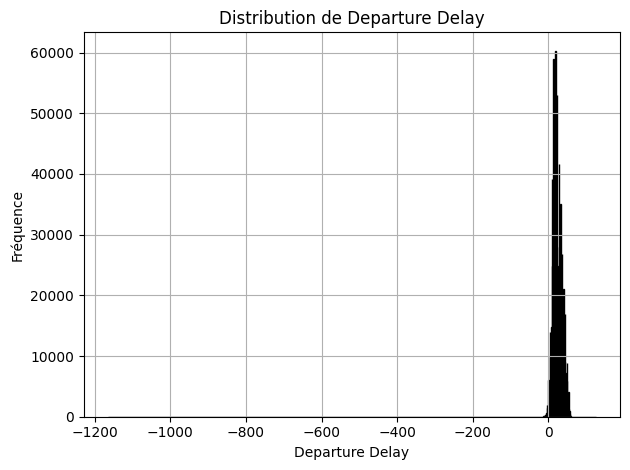

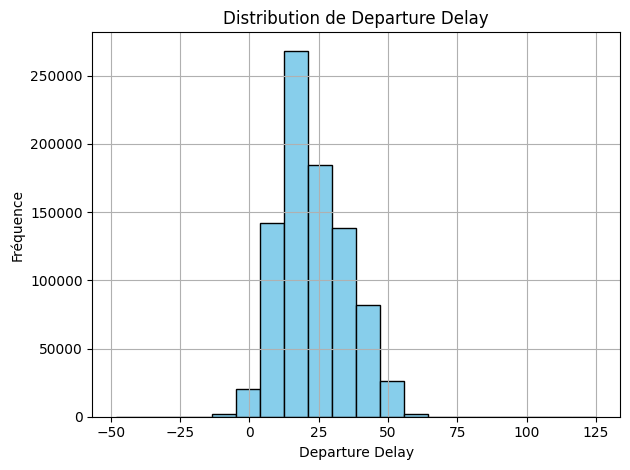

In [9]:
data_viz.make_column_hist(dataset_df, "Departure Delay", bins=1000)
data_viz.make_column_hist(dataset_df[dataset_df["Departure Delay"] > -50], "Departure Delay", bins=20)

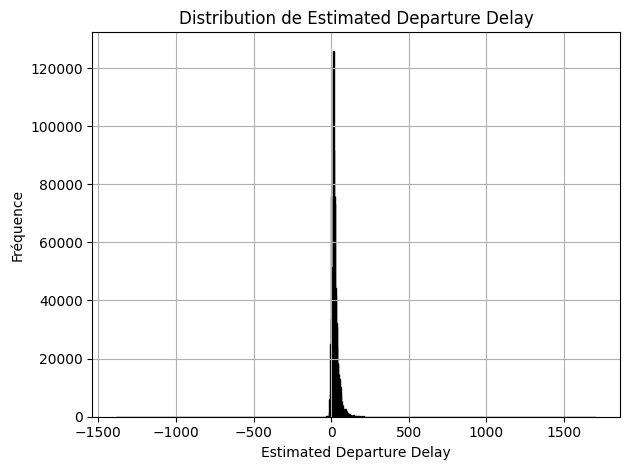

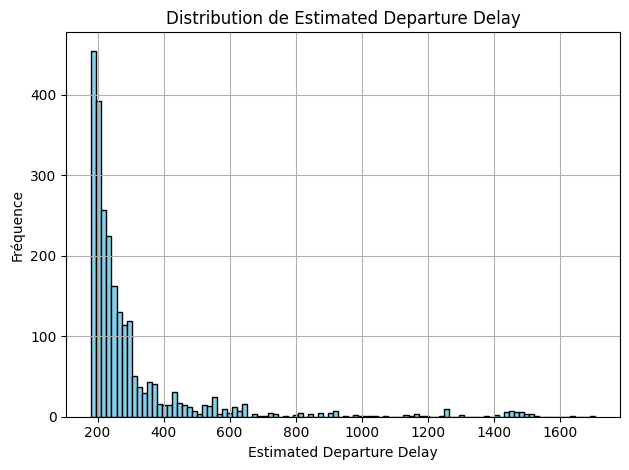

In [10]:
data_viz.make_column_hist(dataset_df, "Estimated Departure Delay", bins=1000)
data_viz.make_column_hist(dataset_df[dataset_df["Estimated Departure Delay"] > 180], "Estimated Departure Delay", bins=100)

In [11]:
dataset_df[(dataset_df["Estimated Departure Delay"] > 0) & (dataset_df["Actual Departure Time"].isna())][-20:]

,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Departure Gate,Scheduled Departure Time,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
890087,kl2068,kl,cdg,2f,f05,2025-04-11 21:30:00,2025-04-11 22:05:00,NaT,alg,2025-04-11 22:55:00,NaT,active,NaN,35.0,True,False,False
890088,kq3016,kq,cdg,2f,f05,2025-04-11 21:30:00,2025-04-11 22:05:00,NaT,alg,2025-04-11 22:55:00,NaT,active,NaN,35.0,True,False,False
890089,mu1561,mu,cdg,2f,f05,2025-04-11 21:30:00,2025-04-11 22:05:00,NaT,alg,2025-04-11 22:55:00,NaT,active,NaN,35.0,True,False,False
890090,af1054,af,cdg,2f,f05,2025-04-11 21:30:00,2025-04-11 22:05:00,NaT,alg,2025-04-11 22:55:00,NaT,active,NaN,35.0,True,False,False
890131,u23244,u2,cdg,2b,b28,2025-04-11 21:50:00,2025-04-11 23:06:00,NaT,edi,2025-04-11 22:35:00,NaT,active,NaN,76.0,True,False,False
890147,am5794,am,cdg,2f,f05,2025-04-11 21:55:00,2025-04-11 22:30:00,NaT,bod,2025-04-11 23:10:00,NaT,active,NaN,35.0,True,False,False
890148,ay6303,ay,cdg,2f,f05,2025-04-11 21:55:00,2025-04-11 22:30:00,NaT,bod,2025-04-11 23:10:00,NaT,active,NaN,35.0,True,False,False
890149,az2614,az,cdg,2f,f05,2025-04-11 21:55:00,2025-04-11 22:30:00,NaT,bod,2025-04-11 23:10:00,NaT,active,NaN,35.0,True,False,False
890150,bt5613,bt,cdg,2f,f05,2025-04-11 21:55:00,2025-04-11 22:30:00,NaT,bod,2025-04-11 23:10:00,NaT,active,NaN,35.0,True,False,False
890151,mu1733,mu,cdg,2f,f05,2025-04-11 21:55:00,2025-04-11 22:30:00,NaT,bod,2025-04-11 23:10:00,NaT,active,NaN,35.0,True,False,False


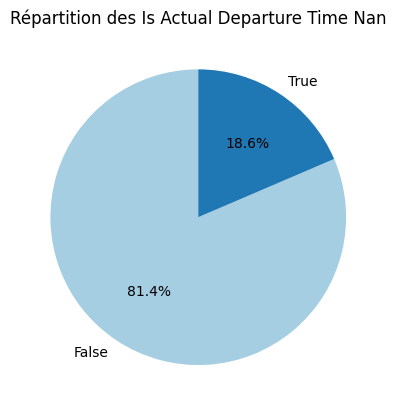

,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Departure Gate,Scheduled Departure Time,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
68,u21338,u2,ory,1,NaN,2024-04-15 08:00:00,2024-04-15 08:51:00,NaT,gva,2024-04-15 09:05:00,NaT,active,NaN,51.0,True,False,True
70,kk4710,kk,ory,orly,e6b,2024-04-15 08:10:00,2024-04-15 08:50:00,NaT,pmi,2024-04-15 10:05:00,NaT,active,NaN,40.0,True,False,False
78,8r1219,8r,ory,1,NaN,2024-04-15 08:35:00,NaT,NaT,rdz,2024-04-15 09:50:00,NaT,active,NaN,NaN,True,True,True
89,af7022,af,ory,orly,a21,2024-04-15 09:05:00,2024-04-15 09:12:00,NaT,aur,2024-04-15 10:25:00,NaT,active,NaN,7.0,True,False,False
90,ce1502,ce,ory,orly,a21,2024-04-15 09:05:00,2024-04-15 09:12:00,NaT,aur,2024-04-15 10:25:00,NaT,active,NaN,7.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890201,kl2146,kl,cdg,2e,l44,2025-04-11 23:20:00,2025-04-12 00:31:00,NaT,mnl,2025-04-12 18:30:00,NaT,active,NaN,71.0,True,False,False
890202,af224,af,cdg,2e,l44,2025-04-11 23:20:00,2025-04-12 00:31:00,NaT,mnl,2025-04-12 18:30:00,NaT,active,NaN,71.0,True,False,False
890217,ag5701,ag,cdg,NaN,NaN,2025-04-12 01:25:00,NaT,NaT,mrs,2025-04-12 02:55:00,NaT,unknown,NaN,NaN,True,True,True
890223,fx5047,fx,cdg,NaN,NaN,2025-04-11 03:53:00,2025-04-11 03:58:00,NaT,ewr,2025-04-11 05:36:00,NaT,active,NaN,5.0,True,False,True


In [12]:
data_viz.camembert_colonne(dataset_df, "Is Actual Departure Time Nan", titre="Répartition des Is Actual Departure Time Nan")
dataset_df[dataset_df["Actual Departure Time"].isna()]

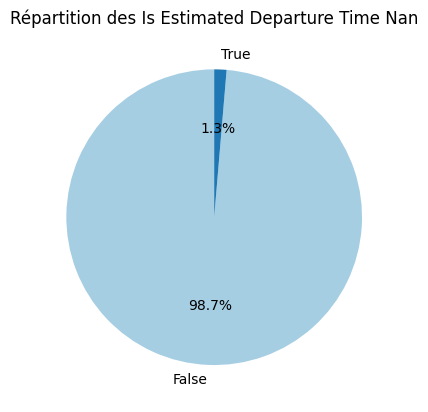

,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Departure Gate,Scheduled Departure Time,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
78,8r1219,8r,ory,1,NaN,2024-04-15 08:35:00,NaT,NaT,rdz,2024-04-15 09:50:00,NaT,active,NaN,NaN,True,True,True
294,8r1216,8r,ory,1,NaN,2024-04-15 16:00:00,NaT,NaT,rdz,2024-04-15 17:15:00,NaT,active,NaN,NaN,True,True,True
412,af7020,af,ory,orly,a17,2024-04-15 20:05:00,NaT,NaT,aur,2024-04-15 21:25:00,NaT,unknown,NaN,NaN,True,True,False
413,ce1506,ce,ory,orly,a17,2024-04-15 20:05:00,NaT,NaT,aur,2024-04-15 21:25:00,NaT,unknown,NaN,NaN,True,True,False
491,tu9001,tu,ory,NaN,NaN,2024-04-15 21:40:00,NaT,NaT,lju,2024-04-15 22:58:00,NaT,cancelled,NaN,NaN,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889443,ro384,ro,cdg,2f,NaN,2025-04-11 16:20:00,NaT,NaT,otp,2025-04-11 20:10:00,NaT,unknown,NaN,NaN,True,True,True
889656,qr8252,qr,cdg,NaN,NaN,2025-04-11 18:00:00,NaT,NaT,doh,2025-04-12 01:25:00,NaT,unknown,NaN,NaN,True,True,True
889824,5k976,5k,cdg,2b,b25,2025-04-11 20:10:00,NaT,NaT,dza,2025-04-12 07:25:00,NaT,unknown,NaN,NaN,True,True,False
890217,ag5701,ag,cdg,NaN,NaN,2025-04-12 01:25:00,NaT,NaT,mrs,2025-04-12 02:55:00,NaT,unknown,NaN,NaN,True,True,True


In [13]:

data_viz.camembert_colonne(dataset_df, "Is Estimated Departure Time Nan", titre="Répartition des Is Estimated Departure Time Nan")
dataset_df[dataset_df["Estimated Departure Time"].isna()]

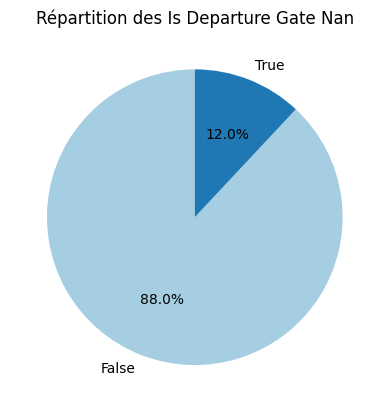

,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Departure Gate,Scheduled Departure Time,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
3,u24803,u2,ory,1,NaN,2024-04-15 06:00:00,2024-04-15 06:06:00,2024-04-15 06:02:00,psa,2024-04-15 07:35:00,2024-04-15 07:22:00,active,2.0,6.0,False,False,True
13,u24841,u2,ory,1,NaN,2024-04-15 06:20:00,2024-04-15 06:10:00,2024-04-15 06:22:00,tls,2024-04-15 07:35:00,2024-04-15 07:19:00,active,2.0,-10.0,False,False,True
34,u24859,u2,ory,1,NaN,2024-04-15 07:00:00,2024-04-15 06:50:00,2024-04-15 07:09:00,nce,2024-04-15 08:25:00,2024-04-15 08:19:00,active,9.0,-10.0,False,False,True
35,u24813,u2,ory,1,NaN,2024-04-15 07:10:00,2024-04-15 07:05:00,2024-04-15 07:17:00,fco,2024-04-15 09:05:00,2024-04-15 08:53:00,active,7.0,-5.0,False,False,True
44,u24823,u2,ory,1,NaN,2024-04-15 07:20:00,2024-04-15 07:22:00,2024-04-15 07:21:00,vce,2024-04-15 09:00:00,2024-04-15 08:41:00,active,1.0,2.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890233,tk6078,tk,cdg,NaN,NaN,2025-04-11 19:40:00,2025-04-11 19:53:00,2025-04-11 20:01:00,ist,2025-04-11 23:42:00,2025-04-11 23:52:00,active,21.0,13.0,False,False,True
890234,fx97,fx,cdg,NaN,NaN,2025-04-11 22:00:00,2025-04-11 22:15:00,2025-04-11 22:16:00,lgg,2025-04-11 22:50:00,2025-04-11 22:47:00,active,16.0,15.0,False,False,True
890235,fx5217,fx,cdg,NaN,NaN,2025-04-11 22:18:00,2025-04-11 22:18:00,2025-04-11 22:14:00,mem,2025-04-12 00:32:00,2025-04-12 00:39:00,active,-4.0,0.0,False,False,True
890236,d07334,d0,cdg,NaN,NaN,2025-04-11 23:35:00,2025-04-11 23:50:00,2025-04-11 23:48:00,mxp,2025-04-12 01:05:00,2025-04-12 00:47:00,active,13.0,15.0,False,False,True


In [14]:

data_viz.camembert_colonne(dataset_df, "Is Departure Gate Nan", titre="Répartition des Is Departure Gate Nan")
dataset_df[dataset_df["Departure Gate"].isna()]

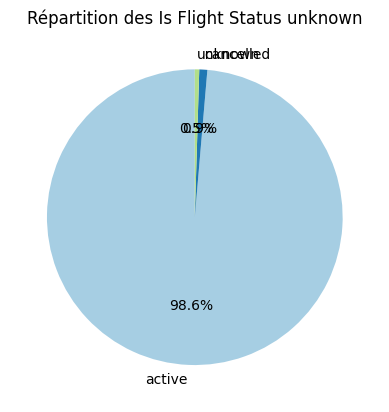

,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Departure Gate,Scheduled Departure Time,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
887684,5o4047,5o,cdg,NaN,NaN,2025-04-11 03:15:00,NaT,NaT,waw,2025-04-11 05:25:00,NaT,unknown,NaN,NaN,True,True,True
887685,5o4408,5o,cdg,NaN,NaN,2025-04-11 03:30:00,NaT,NaT,arn,2025-04-11 06:05:00,NaT,unknown,NaN,NaN,True,True,True
887696,3v4690,3v,cdg,NaN,NaN,2025-04-11 03:54:00,2025-04-11 04:18:00,NaT,fra,2025-04-11 05:10:00,NaT,unknown,NaN,24.0,True,False,True
887703,mb452,mb,cdg,NaN,NaN,2025-04-11 04:15:00,NaT,NaT,cgn,2025-04-11 05:15:00,NaT,unknown,NaN,NaN,True,True,True
887710,5o4650,5o,cdg,NaN,NaN,2025-04-11 04:30:00,NaT,NaT,otp,2025-04-11 08:17:00,NaT,unknown,NaN,NaN,True,True,True
887916,7a111,7a,cdg,NaN,NaN,2025-04-11 08:30:00,NaT,NaT,tun,2025-04-11 11:00:00,NaT,unknown,NaN,NaN,True,True,True
888564,ek9962,ek,cdg,NaN,NaN,2025-04-11 11:35:00,NaT,NaT,dwc,2025-04-11 21:25:00,NaT,unknown,NaN,NaN,True,True,True
888605,sf3001,sf,cdg,1,NaN,2025-04-11 11:45:00,NaT,NaT,alg,2025-04-11 14:15:00,NaT,unknown,NaN,NaN,True,True,True
888716,NaN,NaN,cdg,3,NaN,2025-04-11 12:30:00,NaT,NaT,kef,2025-04-11 14:05:00,NaT,unknown,NaN,NaN,True,True,True
888964,mu7554,mu,cdg,NaN,NaN,2025-04-11 13:25:00,NaT,NaT,pvg,2025-04-12 06:55:00,NaT,unknown,NaN,NaN,True,True,True


In [15]:
data_viz.camembert_colonne(dataset_df, "Flight Status", titre="Répartition des Is Flight Status unknown")
dataset_df[dataset_df["Flight Status"] == "unknown"][-20:]

In [16]:
dataset_df[dataset_df["Departure Terminal"].isna()]

,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Departure Gate,Scheduled Departure Time,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
94,ce1552,ce,ory,NaN,NaN,2024-04-15 09:05:00,2024-04-15 09:13:00,2024-04-15 09:11:00,aur,2024-04-15 10:12:00,2024-04-15 10:11:00,active,6.0,8.0,False,False,True
487,ce1554,ce,ory,NaN,NaN,2024-04-15 15:50:00,2024-04-15 15:58:00,2024-04-15 15:58:00,aur,2024-04-15 16:56:00,2024-04-15 17:13:00,active,8.0,8.0,False,False,True
488,ce1556,ce,ory,NaN,NaN,2024-04-15 20:05:00,2024-04-15 20:13:00,2024-04-15 20:13:00,aur,2024-04-15 21:11:00,2024-04-15 21:24:00,active,8.0,8.0,False,False,True
489,ur401,ur,ory,NaN,NaN,2024-04-15 15:00:00,2024-04-15 15:24:00,NaT,ebb,2024-04-16 00:11:00,NaT,active,NaN,24.0,True,False,True
490,dx74,dx,ory,NaN,NaN,2024-04-15 21:00:00,2024-04-15 21:13:00,2024-04-15 21:22:00,bll,2024-04-15 22:31:00,2024-04-15 22:50:00,active,22.0,13.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890233,tk6078,tk,cdg,NaN,NaN,2025-04-11 19:40:00,2025-04-11 19:53:00,2025-04-11 20:01:00,ist,2025-04-11 23:42:00,2025-04-11 23:52:00,active,21.0,13.0,False,False,True
890234,fx97,fx,cdg,NaN,NaN,2025-04-11 22:00:00,2025-04-11 22:15:00,2025-04-11 22:16:00,lgg,2025-04-11 22:50:00,2025-04-11 22:47:00,active,16.0,15.0,False,False,True
890235,fx5217,fx,cdg,NaN,NaN,2025-04-11 22:18:00,2025-04-11 22:18:00,2025-04-11 22:14:00,mem,2025-04-12 00:32:00,2025-04-12 00:39:00,active,-4.0,0.0,False,False,True
890236,d07334,d0,cdg,NaN,NaN,2025-04-11 23:35:00,2025-04-11 23:50:00,2025-04-11 23:48:00,mxp,2025-04-12 01:05:00,2025-04-12 00:47:00,active,13.0,15.0,False,False,True


In [17]:
dataset_df

,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Departure Gate,Scheduled Departure Time,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
0,hv3810,hv,ory,orly,e04,2024-04-15 06:00:00,2024-04-15 06:10:00,2024-04-15 06:09:00,pmo,2024-04-15 08:25:00,2024-04-15 08:09:00,active,9.0,10.0,False,False,False
1,hv4200,hv,ory,orly,e03,2024-04-15 06:00:00,2024-04-15 06:12:00,2024-04-15 06:06:00,dbv,2024-04-15 08:25:00,2024-04-15 08:00:00,active,6.0,12.0,False,False,False
2,dx4750,dx,ory,orly,e07,2024-04-15 06:00:00,2024-04-15 06:14:00,2024-04-15 06:32:00,bcn,2024-04-15 07:40:00,2024-04-15 07:54:00,active,32.0,14.0,False,False,False
3,u24803,u2,ory,1,NaN,2024-04-15 06:00:00,2024-04-15 06:06:00,2024-04-15 06:02:00,psa,2024-04-15 07:35:00,2024-04-15 07:22:00,active,2.0,6.0,False,False,True
4,ed3530,ed,ory,orly,e6c,2024-04-15 06:05:00,2024-04-15 06:24:00,2024-04-15 06:45:00,chq,2024-04-15 10:30:00,2024-04-15 10:49:00,active,40.0,19.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890233,tk6078,tk,cdg,NaN,NaN,2025-04-11 19:40:00,2025-04-11 19:53:00,2025-04-11 20:01:00,ist,2025-04-11 23:42:00,2025-04-11 23:52:00,active,21.0,13.0,False,False,True
890234,fx97,fx,cdg,NaN,NaN,2025-04-11 22:00:00,2025-04-11 22:15:00,2025-04-11 22:16:00,lgg,2025-04-11 22:50:00,2025-04-11 22:47:00,active,16.0,15.0,False,False,True
890235,fx5217,fx,cdg,NaN,NaN,2025-04-11 22:18:00,2025-04-11 22:18:00,2025-04-11 22:14:00,mem,2025-04-12 00:32:00,2025-04-12 00:39:00,active,-4.0,0.0,False,False,True
890236,d07334,d0,cdg,NaN,NaN,2025-04-11 23:35:00,2025-04-11 23:50:00,2025-04-11 23:48:00,mxp,2025-04-12 01:05:00,2025-04-12 00:47:00,active,13.0,15.0,False,False,True
